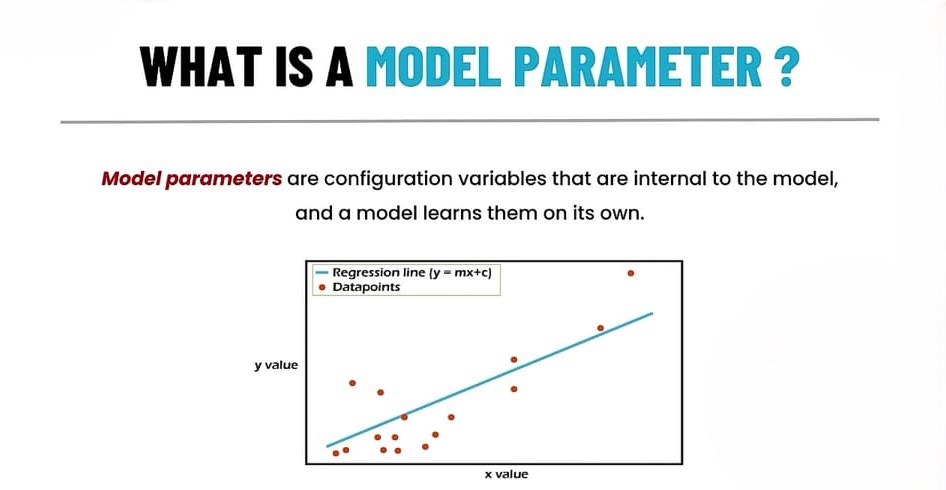

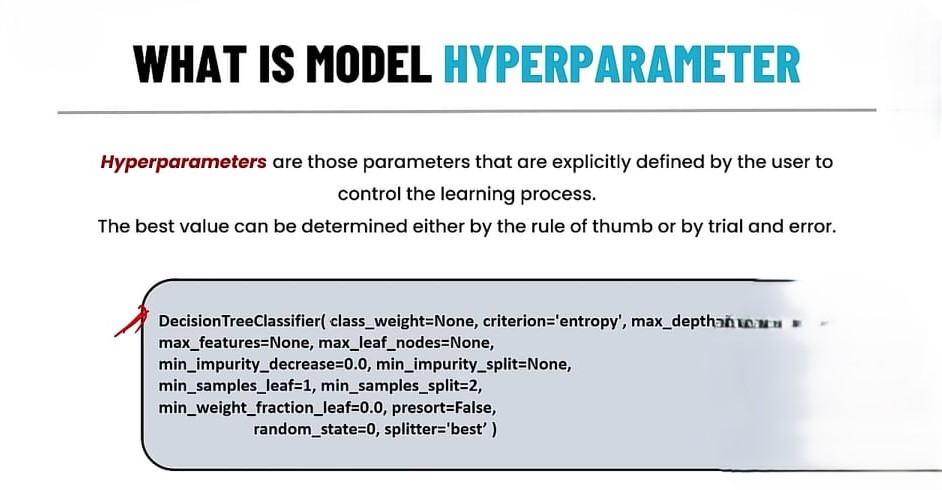

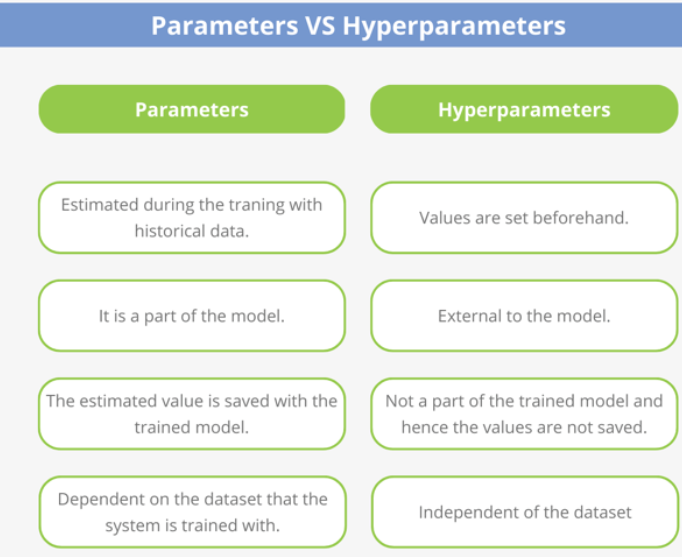

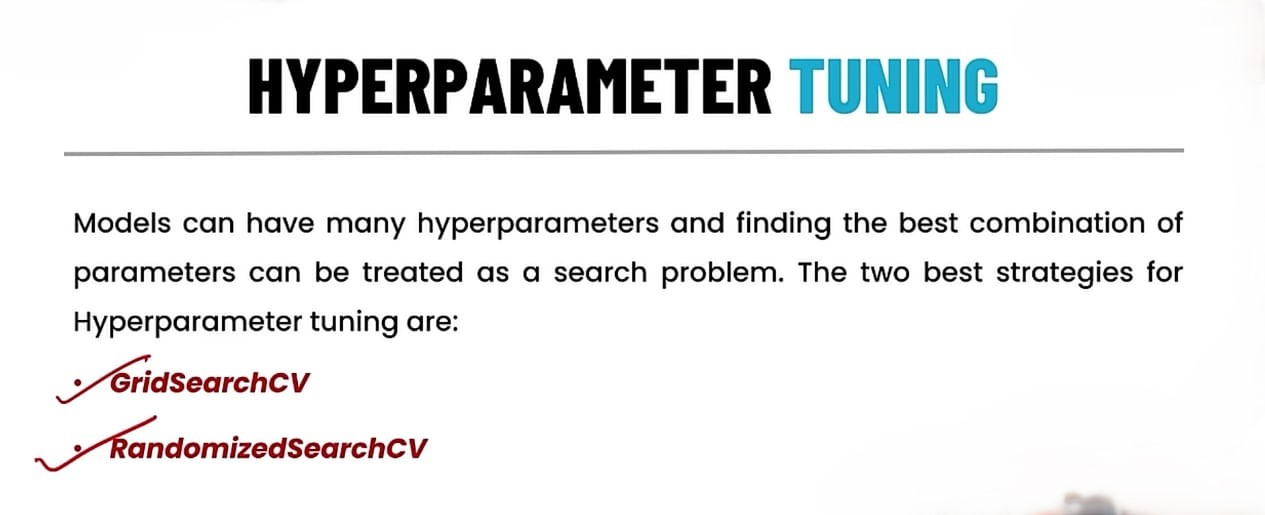

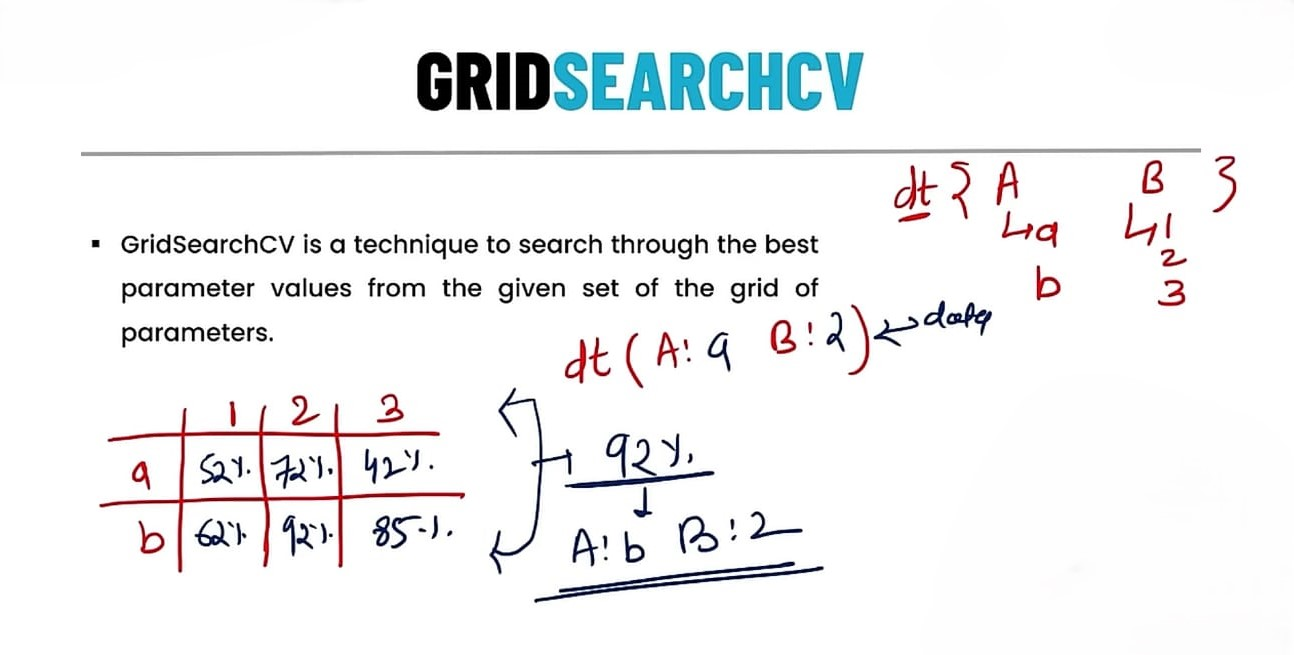

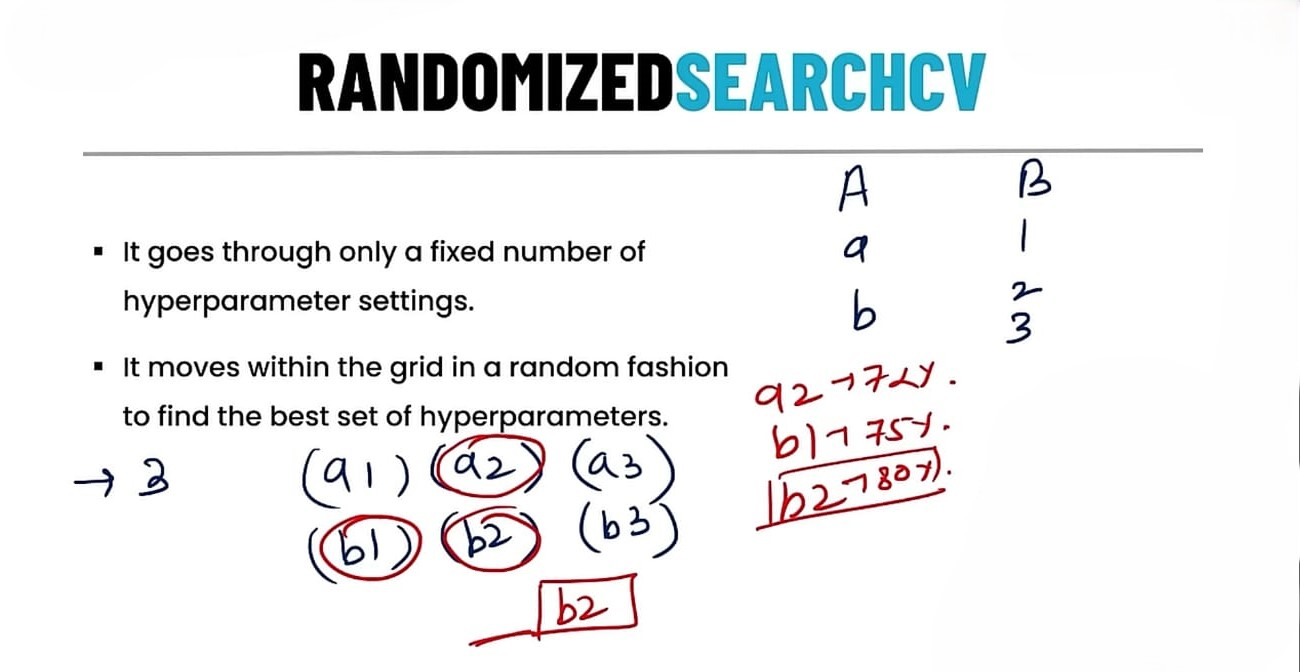

## Hyperparameter Tuning  (PRACTICAL)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('salary.csv')
dataset.head(5)

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [5]:
dataset.isnull().sum()

Level     0
Salary    0
dtype: int64

In [3]:
x = dataset.iloc[:,:-1]
y = dataset['Salary']

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

### GridSearchCV

In [7]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [8]:
dt.score(x_test,y_test)*100

95.375

In [9]:
dt.score(x_train,y_train)*100

100.0

In [10]:
# yes our model is overfitted

In [11]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [28]:
df = { 
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],        # all are hyperparameters under DecisionTreeRegressor()
    'splitter': ['best', 'random'],
    'max_depth': list(range(2, 20))  # Generating values from 2 to 19
}

In [17]:
print(df)

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'splitter': ['best', 'random'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


In [18]:
gd = GridSearchCV(DecisionTreeRegressor(),param_grid=df)

In [19]:
gd.fit(x_train,y_train)

C:\Users\asmas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\asmas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\asmas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\asmas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\asmas\AppData\Local\Programs\Python\Python3

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [21]:
print(gd.best_params_)

{'criterion': 'squared_error', 'max_depth': 2, 'splitter': 'best'}


In [22]:
# it showing the best parameter to apply 

In [23]:
# Apply selected parameter one by one to get best model accuracy

In [24]:
dt = DecisionTreeRegressor(criterion='squared_error',splitter='best',max_depth=10)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [25]:
dt.score(x_test,y_test)*100

95.375

In [26]:
# no chance in any accuracy

In [27]:
gd.best_score_

nan

### RandomizedSearchCV

In [30]:
rd = RandomizedSearchCV(DecisionTreeRegressor(),param_distributions=df,n_iter=20)
rd.fit(x_train,y_train)

C:\Users\asmas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\asmas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\asmas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\asmas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\asmas\AppData\Local\Programs\Python\Python3

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=20,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'splitter': ['best', 'random']})

In [32]:
rd.best_params_

{'splitter': 'best', 'max_depth': 11, 'criterion': 'poisson'}

In [37]:
rd = DecisionTreeRegressor(splitter='best',max_depth= 11, criterion='poisson')
rd.fit(x_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=11)

In [38]:
rd.score(x_test,y_test)*100

95.375

In [39]:
# no change in accuary still

In [40]:
rd.best_score_

AttributeError: 'DecisionTreeRegressor' object has no attribute 'best_score_'